In [58]:
import time
# from selenium import webdriver
# from selenium.common.exceptions import NoSuchElementException
# from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import pandas as pd
import os
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt 
import seaborn as sns


# Load DataSet and Data Dictionary

In [69]:
# main_dir = 
Dataset_name = 'TechLabsDataset.csv' 
DataDictionary_name = 'TechLabsDataset_Dictionary.csv'

Dataset = pd.read_csv(os.path.join('./Data/',Dataset_name), index_col = 0)
DataDictionary = pd.read_csv(os.path.join('./Data/',DataDictionary_name), index_col = 0)

Dataset.head(20)

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG
5,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,69lOZ,0.0,3.0,4 years ago,2022-09-24,5.0,Nice,ENG
6,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,&7jv4,0.0,27.0,3 months ago,2022-09-24,5.0,Good firm. The staff are very welcoming and f...,NOT_ENG
7,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,K2#6M,1.0,24.0,4 months ago,2022-09-24,5.0,"Top company, and coffee, so recommended\n\n",NOT_ENG
8,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,xJ(Zc,0.0,1.0,a year ago,2022-09-24,5.0,A very neat company with professional people ...,NOT_ENG
9,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,QGfwK,1.0,36.0,4 months ago,2022-09-24,5.0,Friendly staff and quickly released\n\n,NOT_ENG


In [60]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8080 entries, 0 to 8079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    8080 non-null   object 
 1   type_company            8080 non-null   object 
 2   lat                     8080 non-null   float64
 3   lon                     8080 non-null   float64
 4   city                    8080 non-null   object 
 5   avg_stars_num           7921 non-null   float64
 6   n_reviews_num           7921 non-null   float64
 7   encoded_user            7911 non-null   object 
 8   local_guide             7236 non-null   float64
 9   clean_other_review_num  7141 non-null   float64
 10  published_date          7911 non-null   object 
 11  today_date              7911 non-null   object 
 12  stars_num               7911 non-null   float64
 13  review_EN               3398 non-null   object 
 14  original_lang           3398 non-null   

In [61]:
Dataset.describe()

,lat,lon,avg_stars_num,n_reviews_num,local_guide,clean_other_review_num,stars_num
count,8080.000000,8080.000000,7921.000000,7921.000000,7236.000000,7141.000000,7911.000000
mean,51.643661,5.011439,3.976354,168.957834,0.539939,58.193110,3.978258
std,0.225721,0.414244,0.533461,133.222970,0.498437,127.036557,1.437719
min,50.998084,4.173568,1.000000,1.000000,0.000000,1.000000,1.000000
25%,51.499010,4.748007,3.800000,49.000000,0.000000,4.000000,3.000000
50%,51.599276,5.008839,4.100000,138.000000,1.000000,16.000000,5.000000
75%,51.696315,5.394760,4.300000,306.000000,1.000000,57.000000,5.000000
max,52.372056,6.183320,5.000000,431.000000,1.000000,1829.000000,5.000000


In [62]:
#How many values are missing per column

Dataset[Dataset["stars_num"].isna()]
# 139 missing rows in "stars_num"
Dataset[Dataset["n_reviews_num"].isna()]
#159 missing values in n_reviews_num
Dataset[Dataset["encoded_user"].isna()]
#169 missing values in "encoded_user"
Dataset[Dataset["local_guide"].isna()]
#844 missing values in "local_guide"
Dataset[Dataset["clean_other_review_num"].isna()]
#939 missing values in "clean_other_review_num"
Dataset[Dataset["published_date"].isna()]
#169 missing values in "published_date"
Dataset[Dataset["today_date"].isna()]
#169 missing values in today_date
Dataset[Dataset["review_EN"].isna()]
#4682 missing values in review_EN
Dataset[Dataset["original_lang"].isna()]
#4682 missing values in original_lang
Dataset[Dataset["avg_stars_num"].isna()]
# 159 missing rows in "avg_stars_num"




,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Leeuw Shipping & Logistics G de,Freight forwarding service,51.865728,4.609845,Ridderkerk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,Milloa Logistics,Trucking company,51.962386,4.584785,IJssel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,ARCO Transport & Logistics B.V.,Trucking company,51.493621,4.742194,Breda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,Berserik logistics B.V.,Trucking company,51.861821,5.764725,Beuningen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957,Yuva Logistics B.V.,Trucking company,51.890077,4.489207,Rotterdam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,Ploeger Logistics België Nv,Trucking company,51.178163,5.411739,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8074,NLS Logistics & Services B.V.,Logistics service,51.437232,5.561307,Geldrop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8075,Van Thiel Logistics,Trucking company,51.827945,5.765815,Nijmegen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:

#How many unique companies are there?

Dataset_unique_titles = Dataset["name"].unique()
Dataset_unique_titles.size
#388

#Unique Company Names
Dataset_unique_titles



array(['Caretrex warehousing & logistics', 'FEFA Logistics',
       'Dekkers Transport Holland', 'Cotra Logistics Solutions BV',
       'Leeuw Shipping & Logistics G de', 'Dedicated Logistics Services',
       'Schenker Logistics Nederland', 'Milloa Logistics',
       'Bos Logistics Schiphol', 'Allroad Logistics',
       'ARCO Transport & Logistics B.V.', 'Berserik logistics B.V.',
       'Sensible Logistics', 'BTS Transport B.V.', 'LB-Logistics',
       'M4 Transport & Logistics', 'KS Project Logistics',
       'Ontruck Nederland', 'Transport J.A. van Wanrooy BV',
       'Rus Cargo Logistics B.V.', 'Hiram transport',
       'Red Transport & Logistics', 'GVT Transport & Logistics Tilburg',
       'Logistics Company Tilburg B.V.', 'Base Logistics BV',
       'ID Logistics Benelux', 'DR Logistics BV', 'GMG Logistics',
       'ChainCargo', 'C. Express', 'Jan De Rijk Retail',
       'Thijssen Koeriers', 'Eurostars Logistics | Koeriersdiensten',
       'Archers Logistics', 'Elst Transport',

In [64]:
#most common locations?
locations = Dataset.value_counts(["city", "name"])
locations


city        name                                                
Nieuwegein  First Logistics B.V.                                    435
Eindhoven   Van Spreuwel Transport                                  384
Tilburg     Claassen Logistics                                      351
            ID Logistics Benelux                                    333
            GVT Transport & Logistics Tilburg                       321
                                                                   ... 
Rijen       Hendrickx Transport & Logistics B.V.                      1
Breda       Consafe Logistics B.V.                                    1
            Almax Executive Management, Logistics & Supply Chain      1
            Air Logistics Europe BV                                   1
Rotterdam   Himex Logistics BV                                        1
Length: 391, dtype: int64

## Companies per city
Where are the companies located?

In [66]:
unique_companies = pd.DataFrame(Dataset).drop_duplicates(subset=["name"])
# Only 388 unique companies?
print(unique_companies.shape, Dataset.shape)

companies_per_city = unique_companies.value_counts(["city"])
# print(companies_per_city)

#top 10 locations bar graphcompanies_per_city.head(10).plot(kind="bar")


(388, 15) (8080, 15)


<AxesSubplot:xlabel='city,name'>

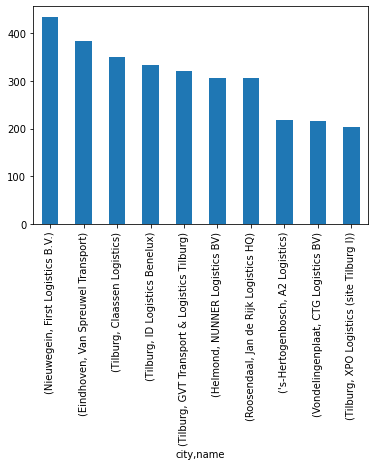

In [33]:
# Delete this?
locations.head(10).plot(kind="bar")

## Distribution of ratings

In [67]:
#Which companies have the lowest ratings? (Number of reviews not considered)

Dataset.sort_values("avg_stars_num").head(10)


#Which companies have the highest ratings? (Number of reviews not considered)
Dataset.sort_values("avg_stars_num", ascending=False).head(10)



,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
5101,Merchant Logistics bv,Logistics service,51.571149,5.114743,Tilburg,5.0,3.0,teEen,0.0,12.0,8 months ago,2022-09-24,5.0,Super\n\n,NOT_ENG
6269,Send Solution B.V.,Logistics service,51.434811,5.509895,Eindhoven,5.0,3.0,GxBAj,NaN,NaN,5 years ago,2022-09-24,5.0,NaN,NaN
6268,Send Solution B.V.,Logistics service,51.434811,5.509895,Eindhoven,5.0,3.0,trjiv,0.0,1.0,a year ago,2022-09-24,5.0,NaN,NaN
6241,Rvd Logistics,Logistics service,51.472178,5.485619,Eindhoven,5.0,1.0,6QkU),0.0,3.0,a year ago,2022-09-23,5.0,"Top service, large network, so always a solut...",NOT_ENG
5921,JCL Logistics Benelux B.V.,Shipping company,51.536057,4.491086,Roosendaal,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5867,Arma Logistics B.V.,Trucking company,52.125476,5.045408,Utrecht,5.0,1.0,IgrE!,1.0,66.0,4 months ago,2022-09-22,5.0,Professional BV\nProfessional Drivers\nArrang...,NOT_ENG
5551,Brunslogistics,Shipping company,51.827945,5.765815,Nijmegen,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5105,TPL Transport Logistics,Trucking company,51.157864,4.489805,Belgium,5.0,2.0,vonHG,1.0,37.0,7 years ago,2022-09-23,5.0,NaN,NaN
5104,TPL Transport Logistics,Trucking company,51.157864,4.489805,Belgium,5.0,2.0,*Ky93,1.0,41.0,7 years ago,2022-09-23,5.0,"Just made use of the TPL Services, correct, f...",NOT_ENG


<AxesSubplot:xlabel='n_reviews_num', ylabel='avg_stars_num'>

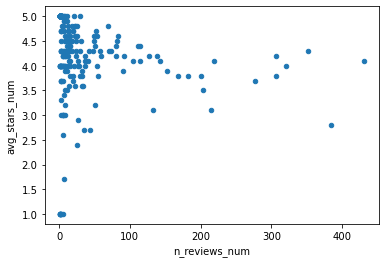

In [68]:
#Which companies have the lowest ratings? (with at least 10 reviews)
over_ten_reviews = Dataset[(Dataset["n_reviews_num"] >= 10)]
high_reviews = over_ten_reviews.sort_values("avg_stars_num",ascending=False).head()
low_reviews = over_ten_reviews.sort_values("avg_stars_num",ascending=True).head()
high_reviews, low_reviews

#produce scatter plot with average ratings vs number of reviews
#does not include companies filtered reviews above
unique_companies.plot(kind="scatter", x="n_reviews_num", y="avg_stars_num")


In [ ]:
#Which companies have the lowest ratings? (Number of reviews considered)
low_reviews = over_ten_reviews.sort_values("avg_stars_num").head()
low_reviews




,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
2430,Crane Worldwide Logistics,Warehouse,51.586597,5.053433,Tilburg,2.4,27.0,kGjLa,0.0,3.0,a year ago,2022-09-24,1.0,Meh,ENG
2445,Crane Worldwide Logistics,Warehouse,51.586597,5.053433,Tilburg,2.4,27.0,ke^JV,1.0,104.0,2 years ago,2022-09-24,5.0,NaN,NaN
2444,Crane Worldwide Logistics,Warehouse,51.586597,5.053433,Tilburg,2.4,27.0,APX&%,0.0,9.0,a year ago,2022-09-24,1.0,NaN,NaN
2442,Crane Worldwide Logistics,Warehouse,51.586597,5.053433,Tilburg,2.4,27.0,kLp6%,0.0,2.0,a year ago,2022-09-24,1.0,NaN,NaN
2441,Crane Worldwide Logistics,Warehouse,51.586597,5.053433,Tilburg,2.4,27.0,q&qOb,0.0,3.0,a year ago,2022-09-24,1.0,NaN,NaN


In [ ]:
#Rows with no missing values
Dataset.dropna()

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG
5,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,69lOZ,0.0,3.0,4 years ago,2022-09-24,5.0,Nice,ENG
6,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,&7jv4,0.0,27.0,3 months ago,2022-09-24,5.0,Good firm. The staff are very welcoming and f...,NOT_ENG
7,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,K2#6M,1.0,24.0,4 months ago,2022-09-24,5.0,"Top company, and coffee, so recommended\n\n",NOT_ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8068,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,AMDIc,0.0,1.0,9 months ago,2022-09-24,1.0,"Untrustworthy people, they are good at lying....",NOT_ENG
8069,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,ivODx,0.0,2.0,a year ago,2022-09-24,1.0,Drives antisocial and overtakes right on the ...,NOT_ENG
8070,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,K1S^G,0.0,17.0,a year ago,2022-09-24,5.0,"In a word, toppers! Always think in possibili...",NOT_ENG
8071,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,RP^Ug,1.0,101.0,a year ago,2022-09-24,5.0,First service\n\n,NOT_ENG


In [ ]:
Dataset.dropna(how="all")

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang
0,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,HHpDM,0.0,4.0,2 years ago,2022-09-24,5.0,NaN,NaN
1,Caretrex warehousing & logistics,Logistics service,51.593721,5.073492,Tilburg,5.0,2.0,dYFWx,0.0,1.0,5 years ago,2022-09-24,5.0,NaN,NaN
2,FEFA Logistics,Trucking company,51.480074,5.446764,Eindhoven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,Van Thiel Logistics,Trucking company,51.827945,5.765815,Nijmegen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8076,InTime Logistics & Consulting,Trucking company,52.049578,5.117079,Nieuwegein,4.7,3.0,wqc@z,1.0,13.0,9 months ago,2022-09-22,5.0,Unique\n\n,NOT_ENG
8077,InTime Logistics & Consulting,Trucking company,52.049578,5.117079,Nieuwegein,4.7,3.0,0*Rv2,0.0,1.0,8 months ago,2022-09-22,5.0,NaN,NaN
8078,InTime Logistics & Consulting,Trucking company,52.049578,5.117079,Nieuwegein,4.7,3.0,7GAL*,0.0,2.0,2 years ago,2022-09-22,4.0,NaN,NaN


In [ ]:
Dataset["avg_stars_num"].dropna()

0       5.0
1       5.0
3       4.6
4       4.6
5       4.6
       ... 
8072    3.5
8073    3.5
8076    4.7
8077    4.7
8078    4.7
Name: avg_stars_num, Length: 7921, dtype: float64